In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df  = pd.read_csv('combined_with_departments.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT
0,0,151938,Wisniewski,Ryan,Associate Lecturer,2961.56,0.0,21999.978,Ryan Wisniewski,-1.0,0,Counseling & School Psychology
1,1,761959,Ayeh,Danielle,Associate Lecturer,5923.05,0.0,43999.998,Danielle Ayeh,-1.0,0,Counseling & School Psychology
2,2,777807,Luce,Kristin,Clinical Associate Lecturer A,5833.38,0.0,43333.420,Kristin Luce,4.4,28,Nursing
3,3,804983,Mannion,Adeleine,Associate Lecturer,740.39,0.0,5499.998,Adeleine Mannion,-1.0,0,Curriculum & Instruction
4,4,805890,Mouffe,Jerome,Assoc Lecturer A,1174.74,0.0,8726.380,Jerome Mouffe,3.9,10,Performing Arts


In [2]:
unique_departments = df['DEPARTMENT'].value_counts()
print(unique_departments)

DEPARTMENT
Nursing                                           222
English                                            83
Biology                                            59
Curriculum & Instruction                           56
Performing Arts                                    49
                                                 ... 
Gaston Institute                                    1
Asian American Studies Program                      1
Project REACH                                       1
Provost & Vice Chancellor for Academic Affairs      1
Vice Provost for Academic Support Services          1
Name: count, Length: 64, dtype: int64


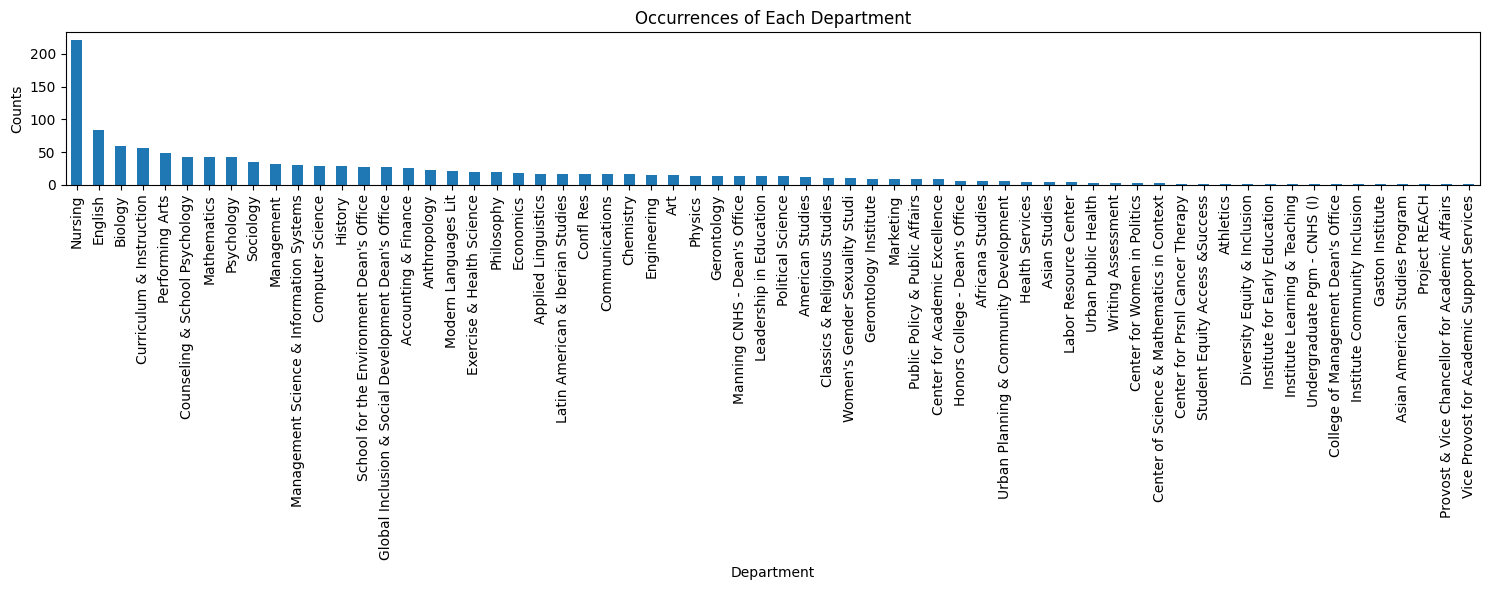

In [3]:
plt.figure(figsize=(15, 6))
unique_departments.plot(kind='bar')
plt.title('Occurrences of Each Department')
plt.xlabel('Department')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
unique_positions = df['POSITION_TITLE'].value_counts()
print(unique_positions)

POSITION_TITLE
Associate Lecturer                260
Associate Professor               166
Lecturer                          121
Assistant Professor               106
Professor                         102
Senior Lecturer                    96
Clinical Associate Lecturer        80
Clinical Associate Lecturer A      73
Assoc Lecturer A                   66
Senior Lecturer II                 48
Senior Lecturer III                37
Grad Prog Dir/Assoc Professor      31
Clinical Lecturer                  16
Grad Prog Dir/Professor            13
Clinical Lecturer A                11
Visiting Assistant Professor        9
Clinical Senior Lecturer I          5
Professor A                         4
Distinguished Univ Professor        4
Research Assistant Professor        3
Clinical Assistant Professor        3
Lecturer A                          2
Research Professor                  2
Clinical Asst Professor A           2
Director & Professor A              1
Grad Prog Dir, Senior Lecturer     

In [5]:
def categorize_title(title):
    if 'Lecturer' in title:
        return 'Lecturer'
    elif 'Associate Professor' in title:
        return 'Associate Professor'
    elif 'Assistant Professor' in title:
        return 'Assistant Professor'
    elif 'Professor' in title and 'Assistant' not in title and 'Associate' not in title:
        return 'Professor'
    else:
        return 'Other'

# Make a new column
df['Position Category'] = df['POSITION_TITLE'].apply(categorize_title)

# Check if that worked
category_counts = df['Position Category'].value_counts()
print(category_counts)

Position Category
Lecturer               817
Associate Professor    167
Professor              161
Assistant Professor    121
Name: count, dtype: int64


In [6]:
lecturer_rows = df[df['Position Category'] == 'Lecturer']
lecturer_rows.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT,Position Category
0,0,151938,Wisniewski,Ryan,Associate Lecturer,2961.56,0.0,21999.978,Ryan Wisniewski,-1.0,0,Counseling & School Psychology,Lecturer
1,1,761959,Ayeh,Danielle,Associate Lecturer,5923.05,0.0,43999.998,Danielle Ayeh,-1.0,0,Counseling & School Psychology,Lecturer
2,2,777807,Luce,Kristin,Clinical Associate Lecturer A,5833.38,0.0,43333.420,Kristin Luce,4.4,28,Nursing,Lecturer
3,3,804983,Mannion,Adeleine,Associate Lecturer,740.39,0.0,5499.998,Adeleine Mannion,-1.0,0,Curriculum & Instruction,Lecturer
4,4,805890,Mouffe,Jerome,Assoc Lecturer A,1174.74,0.0,8726.380,Jerome Mouffe,3.9,10,Performing Arts,Lecturer


In [7]:
lecturer_department_counts = lecturer_rows['DEPARTMENT'].value_counts()
print(lecturer_department_counts)

DEPARTMENT
Nursing                                                203
English                                                 58
Curriculum & Instruction                                43
Performing Arts                                         43
Biology                                                 31
Mathematics                                             28
Counseling & School Psychology                          26
Sociology                                               23
Psychology                                              23
Management                                              20
Global Inclusion & Social Development Dean's Office     18
History                                                 17
Management Science & Information Systems                15
Modern Languages Lit                                    15
Manning CNHS - Dean's Office                            13
School for the Environment Dean's Office                12
Anthropology                                 

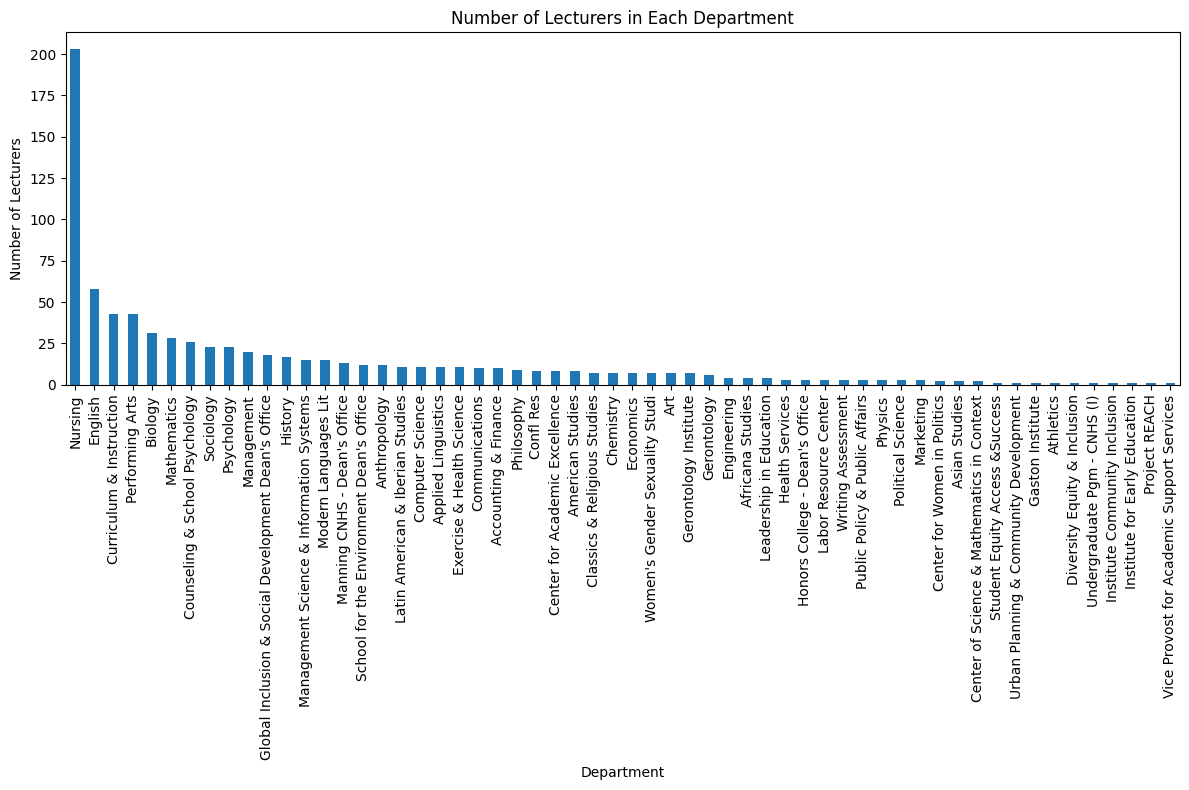

In [8]:
plt.figure(figsize=(12, 8))
lecturer_department_counts.plot(kind='bar') 
plt.title('Number of Lecturers in Each Department') 
plt.xlabel('Department') 
plt.ylabel('Number of Lecturers')  
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

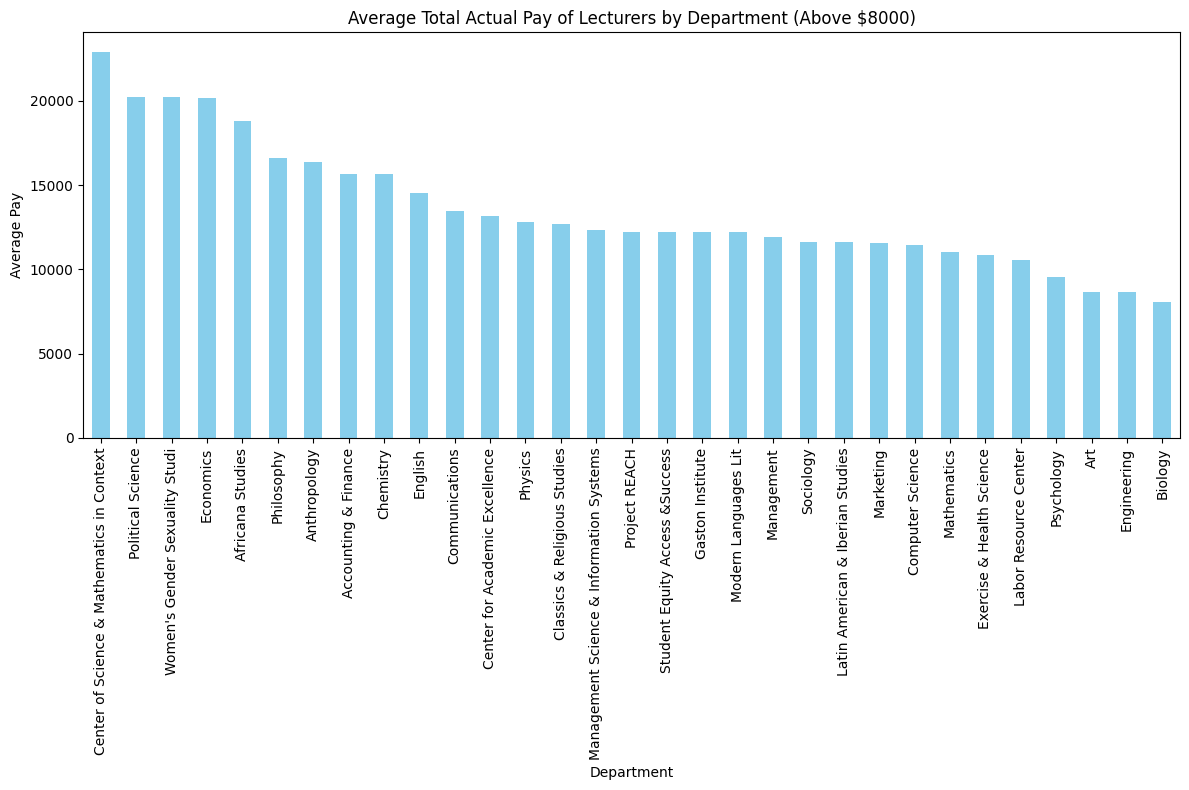

In [58]:
# Compute the average pay
average_pay_by_department = lecturer_rows.groupby('DEPARTMENT')['PAY_TOTAL_ACTUAL'].mean()

filtered_pay = average_pay_by_department[average_pay_by_department > 8000].sort_values(ascending=False)

plt.figure(figsize=(12, 8)) 
filtered_pay.plot(kind='bar', color='skyblue') 
plt.title('Average Total Actual Pay of Lecturers by Department (Above $8000)')  
plt.xlabel('Department') 
plt.ylabel('Average Pay') 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
center_science_math_context = df[df['DEPARTMENT'] == 'Center of Science & Mathematics in Context']
center_science_math_context.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT,Position Category
345,345,2317038,Crounse,Karen,Senior Lecturer,27738.61,4706.25,101103.339,Karen Crounse,4.8,29,Center of Science & Mathematics in Context,Lecturer
841,841,2325250,Lim,Wan Sin,Lecturer,18091.32,0.00,79413.779,Wan Sin Lim,5.0,5,Center of Science & Mathematics in Context,Lecturer


In [10]:
associate_prof_rows = df[df['Position Category'] == 'Associate Professor']
associate_prof_rows.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT,Position Category
23,23,2311500,Milliken,Laura,Associate Professor,29840.36,0.0,130987.616,Laura Milliken,3.0,4,Exercise & Health Science,Associate Professor
27,27,2311537,Stevenson,Robert,Associate Professor,31838.68,0.0,139759.383,Robert Stevenson,3.5,29,Biology,Associate Professor
77,77,2312987,Dorado-Banacloche,Silvia,Associate Professor,38100.68,0.0,167247.121,Silvia Dorado-Banacloche,2.1,8,Management,Associate Professor
85,85,2313116,White,Brian,Associate Professor,27184.44,0.0,119328.925,Brian White,4.9,225,Biology,Associate Professor
88,88,2313191,Hogan,Thomas,Associate Professor,40746.84,0.0,178862.624,Thomas Hogan,4.0,34,Accounting & Finance,Associate Professor


In [11]:
associate_prof_department_counts = associate_prof_rows['DEPARTMENT'].value_counts()
print(associate_prof_department_counts)

DEPARTMENT
English                                                13
Biology                                                11
Accounting & Finance                                   10
Anthropology                                            7
Computer Science                                        6
Counseling & School Psychology                          6
Philosophy                                              6
Management                                              5
Nursing                                                 5
Economics                                               5
Political Science                                       5
Latin American & Iberian Studies                        5
Management Science & Information Systems                5
Chemistry                                               4
History                                                 4
Mathematics                                             4
Global Inclusion & Social Development Dean's Office     4
Com

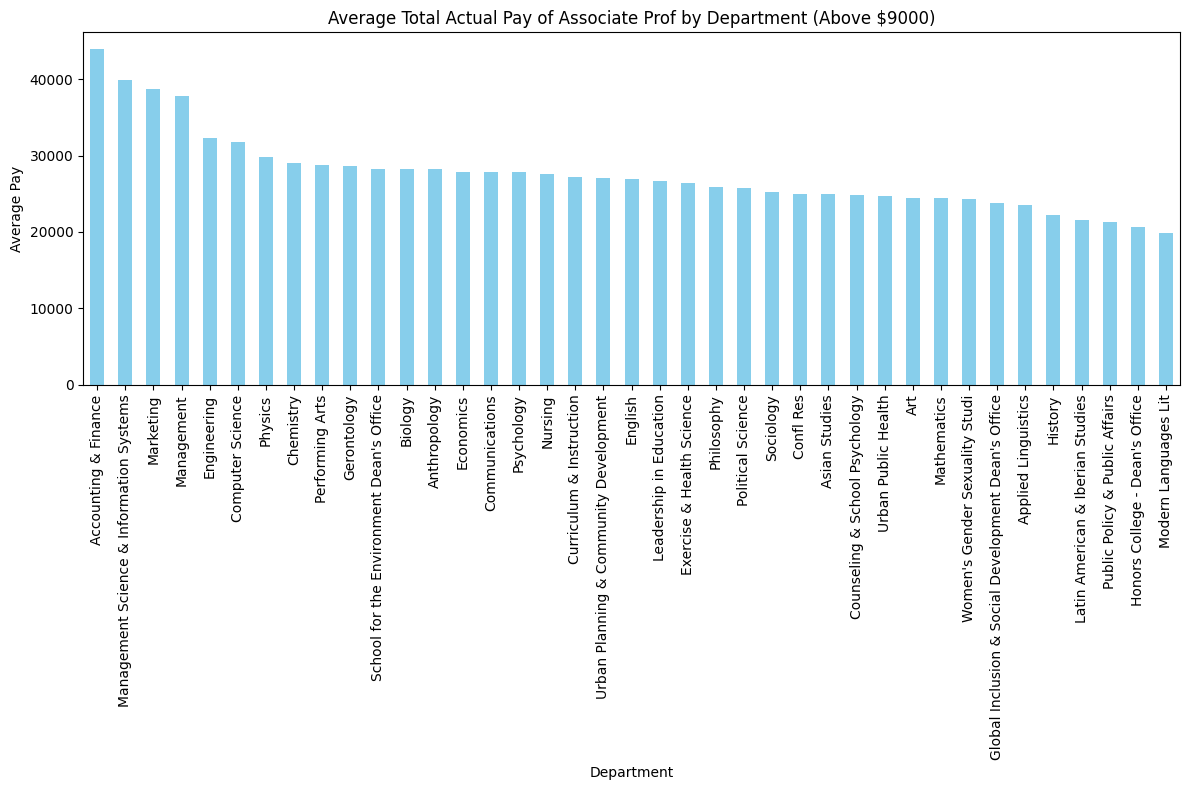

In [23]:
associate_prof_average_pay_by_department = associate_prof_rows.groupby('DEPARTMENT')['PAY_TOTAL_ACTUAL'].mean()
associate_prof_filtered_pay = associate_prof_average_pay_by_department[associate_prof_average_pay_by_department > 9000].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
associate_prof_filtered_pay.plot(kind='bar', color='skyblue')
plt.title('Average Total Actual Pay of Associate Prof by Department (Above $9000)')
plt.xlabel('Department') 
plt.ylabel('Average Pay') 
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

In [13]:
#####################################################

In [14]:
assistant_prof_rows = df[df['Position Category'] == 'Assistant Professor']
assistant_prof_rows.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT,Position Category
13,13,1882631,Auguste,Evan,Assistant Professor,20962.00,1250.0,86528.000,Evan Auguste,5.0,5,Psychology,Assistant Professor
17,17,2288548,Lazarev,Oleg,Assistant Professor,21512.88,150.0,93774.720,Oleg Lazarev,2.9,7,Mathematics,Assistant Professor
87,87,2313151,Koman,Gregory,Assistant Professor,21086.16,0.0,92560.000,Gregory Koman,-1.0,0,School for the Environment Dean's Office,Assistant Professor
264,264,2315718,Colon,Melissa,Assistant Professor,18480.00,0.0,81120.000,Melissa Colon,4.3,4,Leadership in Education,Assistant Professor
309,309,2316412,Atallah Gutierrez,Devin,Assistant Professor,19707.28,0.0,86507.318,Devin Atallah Gutierrez,5.0,7,NaN,Assistant Professor


In [15]:
assistant_prof_department_counts = assistant_prof_rows['DEPARTMENT'].value_counts()
print(assistant_prof_department_counts)

DEPARTMENT
Nursing                                                8
Computer Science                                       8
Biology                                                7
Sociology                                              6
Mathematics                                            5
Management Science & Information Systems               5
English                                                5
Physics                                                5
Economics                                              4
Counseling & School Psychology                         4
Gerontology                                            4
Leadership in Education                                4
Accounting & Finance                                   4
Engineering                                            4
Exercise & Health Science                              3
School for the Environment Dean's Office               3
History                                                3
Psychology          

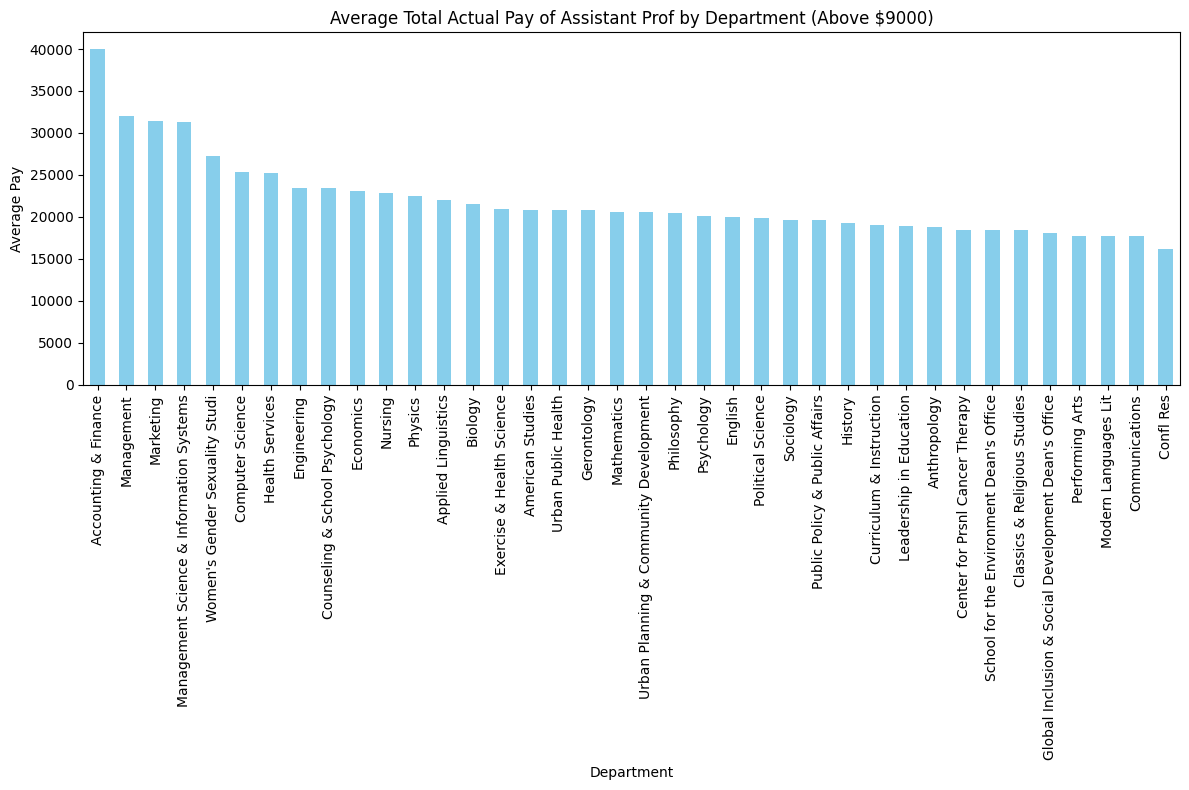

In [22]:
assistant_prof_average_pay_by_department = assistant_prof_rows.groupby('DEPARTMENT')['PAY_TOTAL_ACTUAL'].mean()
assistant_prof_filtered_pay = assistant_prof_average_pay_by_department[assistant_prof_average_pay_by_department > 9000].sort_values(ascending=False)

plt.figure(figsize=(12, 8)) 
assistant_prof_filtered_pay.plot(kind='bar', color='skyblue')
plt.title('Average Total Actual Pay of Assistant Prof by Department (Above $9000)') 
plt.xlabel('Department')
plt.ylabel('Average Pay') 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
#############################################

In [18]:
prof_rows = df[df['Position Category'] == 'Professor']
prof_rows.head()

,Unnamed: 0.1,Unnamed: 0,NAME_LAST,NAME_FIRST,POSITION_TITLE,PAY_TOTAL_ACTUAL,PAY_OTHER_ACTUAL,ANNUAL_RATE,FULL_NAME,RATING,NUM_RATINGS,DEPARTMENT,Position Category
22,22,2311477,Lecklider,Aaron,Grad Prog Dir/Professor,31787.64,0.0,139496.455,Aaron Lecklider,4.4,21,American Studies,Professor
26,26,2311526,Rothwell,Kenneth,Professor,33569.16,0.0,147355.410,Kenneth Rothwell,4.5,41,Classics & Religious Studies,Professor
31,31,2311681,Gounari,Panagiota,Professor,29412.96,0.0,129111.561,Panagiota Gounari,0.0,0,Applied Linguistics,Professor
42,42,2312021,Klimasmith,Elizabeth,Professor,34073.68,0.0,149570.271,Elizabeth Klimasmith,-1.0,0,English,Professor
43,43,2312053,Burgin,Diana,Professor,18436.52,0.0,80928.905,Diana Burgin,2.4,3,Modern Languages Lit,Professor


In [19]:
prof_department_counts = prof_rows['DEPARTMENT'].value_counts()
print(prof_department_counts)

DEPARTMENT
Psychology                                             12
Biology                                                10
School for the Environment Dean's Office                9
Curriculum & Instruction                                8
English                                                 7
Counseling & School Psychology                          7
Nursing                                                 6
Confl Res                                               5
Chemistry                                               5
Mathematics                                             5
Management Science & Information Systems                5
Art                                                     4
History                                                 4
Management                                              4
Engineering                                             4
Computer Science                                        4
Exercise & Health Science                               3
Pol

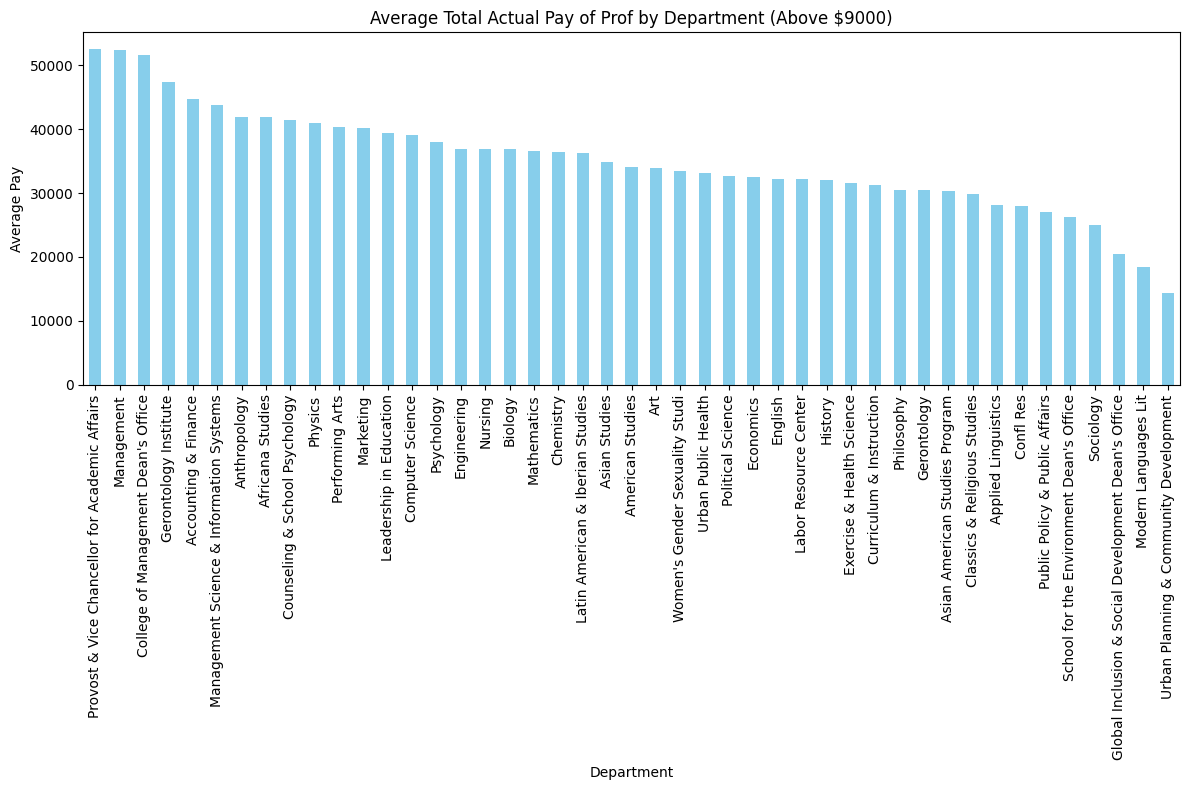

In [21]:
prof_average_pay_by_department = prof_rows.groupby('DEPARTMENT')['PAY_TOTAL_ACTUAL'].mean()
prof_filtered_pay = prof_average_pay_by_department[prof_average_pay_by_department > 9000].sort_values(ascending=False)

plt.figure(figsize=(12, 8)) 
prof_filtered_pay.plot(kind='bar', color='skyblue') 
plt.title('Average Total Actual Pay of Prof by Department (Above $9000)') 
plt.xlabel('Department')  
plt.ylabel('Average Pay') 
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()